In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io
import os
import re

In [106]:
csv_path = r"/content/WHR_2023.csv"
if os.path.exists(csv_path):
    happy23_df = pd.read_csv(csv_path, header=0)
    print("Dataset:")
    display(happy23_df)
else:
    print(f"The file at {csv_path} does not exist.")


Dataset:


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [107]:
if 'region' in happy23_df.columns:
    happy23_df= happy23_df.drop(columns=['region'])
    display(happy23_df)

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [118]:
happy23_df = happy23_df.rename(columns={
    'сountry ': 'Country or region',
    'happiness_score': 'Score',
    'gdp_per_capita': 'GDP per capita',
    'social_support': 'Social support',
    'healthy_life_expectancy': 'Healthy life expectancy',
    'freedom_to_make_life_choices': 'Freedom to make life choices',
    'generosity': 'Generosity',
    'perceptions_of_corruption': 'Perceptions of corruption'
})


In [119]:
happy23_df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


In [120]:
happy23_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   Score                         137 non-null    float64
 2   GDP per capita                137 non-null    float64
 3   Social support                137 non-null    float64
 4   Healthy life expectancy       136 non-null    float64
 5   Freedom to make life choices  137 non-null    float64
 6   Generosity                    137 non-null    float64
 7   Perceptions of corruption     137 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.7+ KB


In [121]:
top_10_df=happy23_df.head(10)
display(top_10_df)
bot_10_df=happy23_df.tail(10)
display(bot_10_df)

,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,7.403,1.942,1.488,0.545,0.672,0.251,0.394
5,Sweden,7.395,1.921,1.510,0.562,0.754,0.225,0.520
6,Norway,7.315,1.994,1.521,0.544,0.752,0.212,0.463
7,Switzerland,7.240,2.022,1.463,0.582,0.678,0.151,0.475
8,Luxembourg,7.228,2.200,1.357,0.549,0.710,0.149,0.418
9,New Zealand,7.123,1.842,1.544,0.513,0.672,0.230,0.471


,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
127,Zambia,3.982,0.914,0.890,0.095,0.545,0.189,0.080
128,Tanzania,3.694,0.836,0.787,0.214,0.607,0.234,0.269
129,Comoros,3.545,0.914,0.327,0.215,0.117,0.129,0.145
130,Malawi,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,2.392,1.417,0.476,0.398,0.123,0.061,0.027
136,Afghanistan,1.859,0.645,0.000,0.087,0.000,0.093,0.059


In [122]:
columns_to_mean = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption"
]
display(columns_to_mean)

['GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [123]:
top_10_avg = top_10_df[columns_to_mean].mean()
display(top_10_avg)

GDP per capita                  1.9517
Social support                  1.5157
Healthy life expectancy         0.5503
Freedom to make life choices    0.7051
Generosity                      0.1926
Perceptions of corruption       0.4146
dtype: float64

In [124]:
top_10_avg = top_10_df[columns_to_mean].mean()
bot_10_avg = bot_10_df[columns_to_mean].mean()
avg_comparison = pd.DataFrame({
    "Top 10 Happiest": top_10_avg,
    "Bottom 10 Least Happy": bot_10_avg
    })
print("\nAverage Indicators for Top 10 Happiest and Bottom 10 Least Happy Countries:")
display(avg_comparison)


Average Indicators for Top 10 Happiest and Bottom 10 Least Happy Countries:


,Top 10 Happiest,Bottom 10 Least Happy
GDP per capita,1.9517,0.8793
Social support,1.5157,0.6205
Healthy life expectancy,0.5503,0.1551
Freedom to make life choices,0.7051,0.3471
Generosity,0.1926,0.1354
Perceptions of corruption,0.4146,0.1016


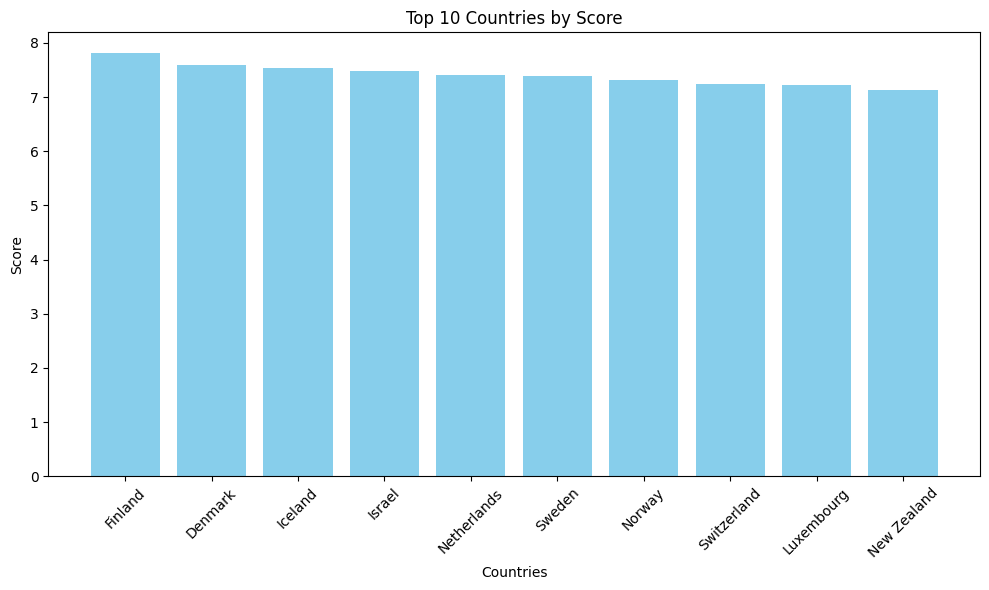

In [125]:
top_10_df = happy23_df.head(10)
countries = top_10_df['country']
values = top_10_df['Score']
plt.figure(figsize=(10, 6))
plt.bar(countries, values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Score')
plt.title('Top 10 Countries by Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

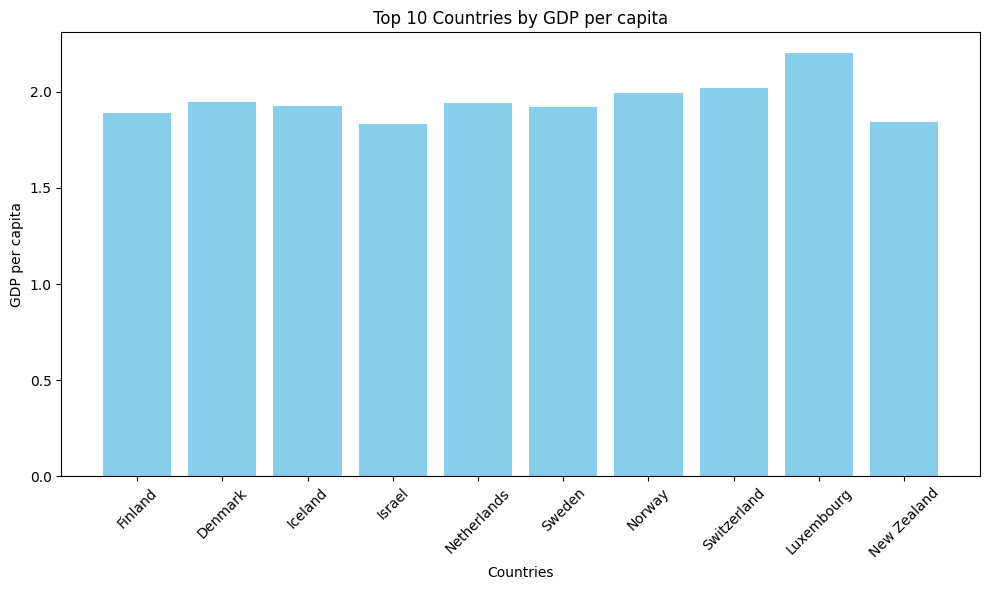

In [126]:
top_10_df = happy23_df.head(10)
countries = top_10_df['country']
values = top_10_df['GDP per capita']
plt.figure(figsize=(10, 6))
plt.bar(countries, values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('GDP per capita')
plt.title('Top 10 Countries by GDP per capita')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

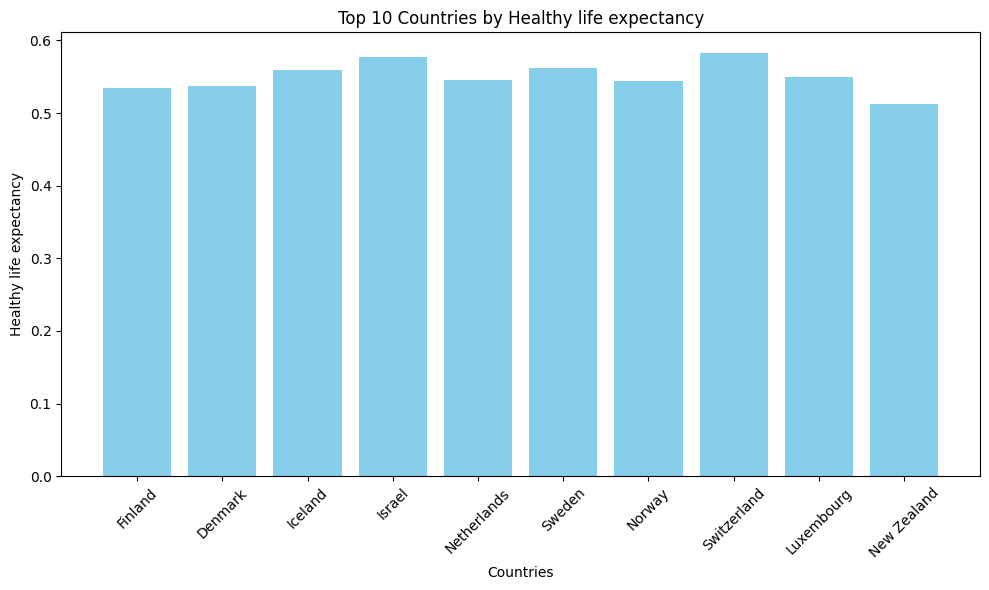

In [127]:
top_10_df = happy23_df.head(10)
countries = top_10_df['country']
values = top_10_df['Healthy life expectancy']
plt.figure(figsize=(10, 6))
plt.bar(countries, values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Healthy life expectancy')
plt.title('Top 10 Countries by Healthy life expectancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

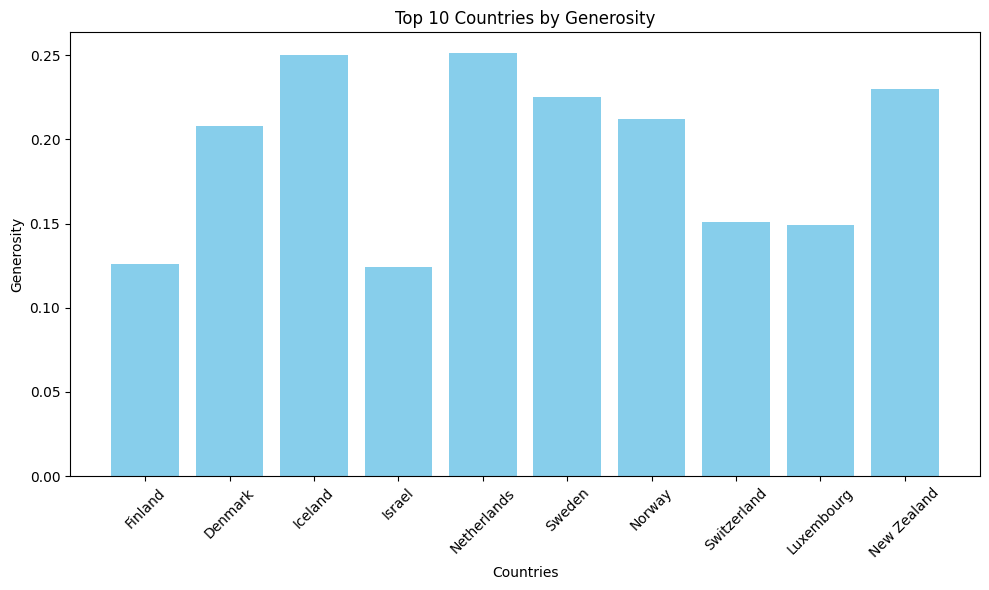

In [128]:
top_10_df = happy23_df.head(10)
countries = top_10_df['country']
values = top_10_df['Generosity']
plt.figure(figsize=(10, 6))
plt.bar(countries, values, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Generosity')
plt.title('Top 10 Countries by Generosity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

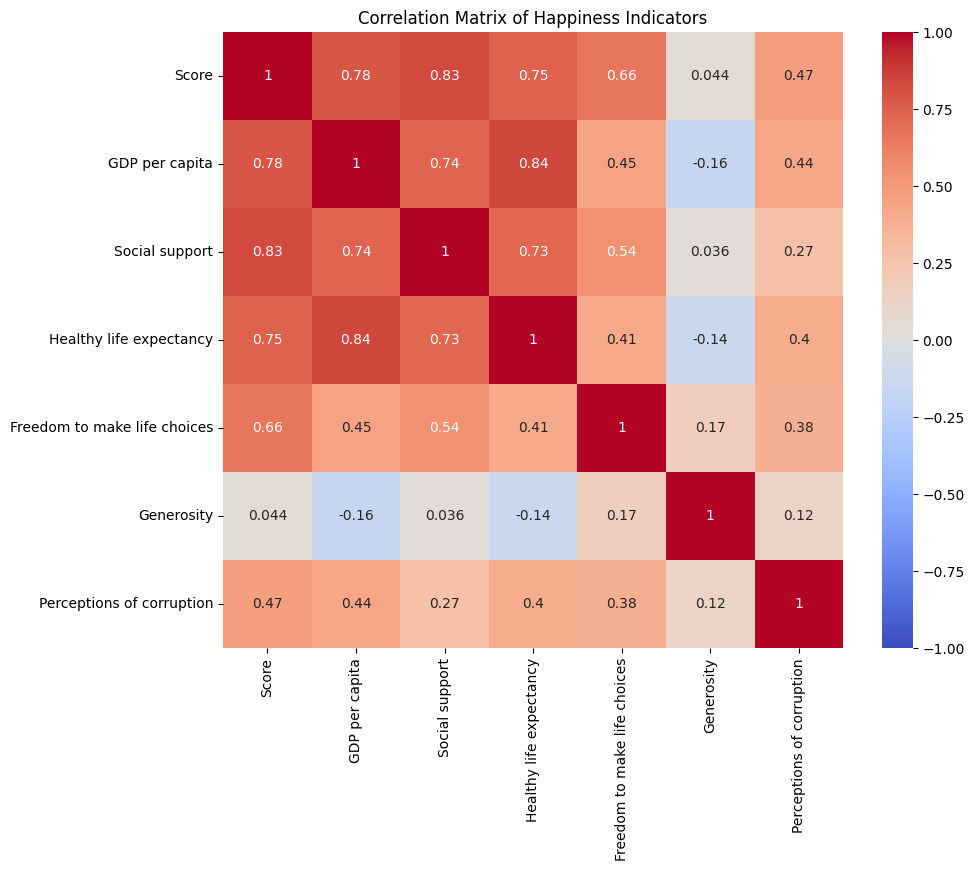

In [129]:
numeric_columns = happy23_df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Happiness Indicators')
plt.show()

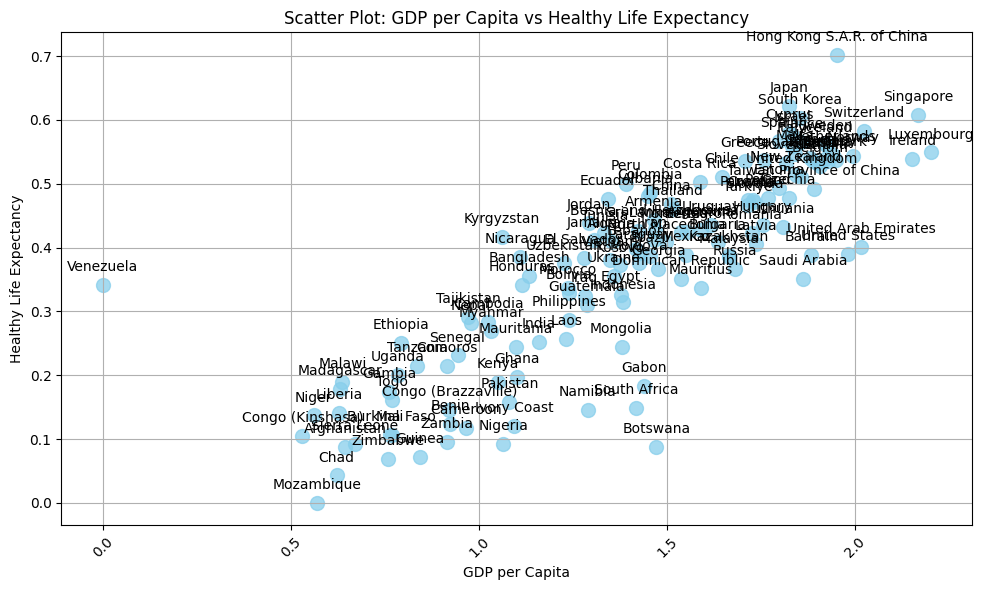

In [130]:
x = happy23_df['GDP per capita']
y = happy23_df['Healthy life expectancy']
countries = happy23_df['country']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='skyblue', marker='o', s=100, alpha=0.75)
plt.title('Scatter Plot: GDP per Capita vs Healthy Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Healthy Life Expectancy')
plt.xticks(rotation=45)
for i, country in enumerate(countries):
    plt.annotate(country, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.tight_layout()
plt.grid(True)
plt.show()